In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

## No effect

In [71]:
days = 150

mu_control, sigma_control, n_control = 100, 20, 1000
mu_experiment, sigma_experiment, n_experiment = 100, 20, 1000

In [72]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [73]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1


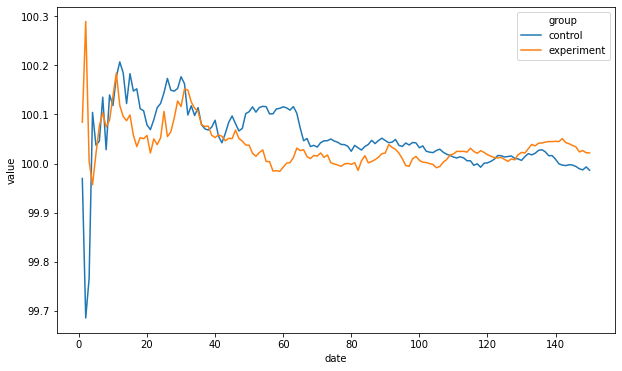

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=daily_data.reset_index(), x="date", y="value", hue = 'group')

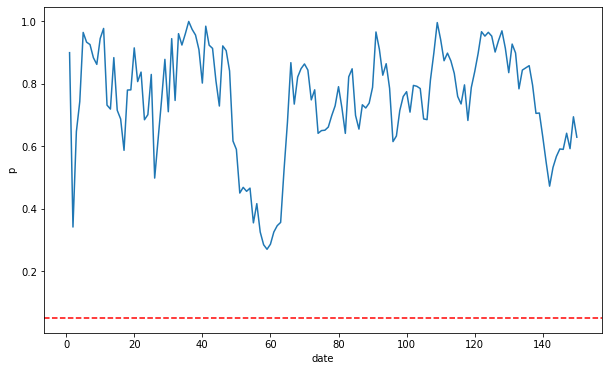

In [75]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=stat_result.reset_index(), x="date", y="p")
ax.axhline(0.05, ls='--', color='red', alpha = 1)
# ax.axvline(50, ls='--', color='blue', alpha = 0.3)

## With effect

In [3]:
days = 100

mu_control, sigma_control, n_control = 100, 20, 1000
mu_experiment, sigma_experiment, n_experiment = 100.3, 20, 1000

In [4]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [5]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1

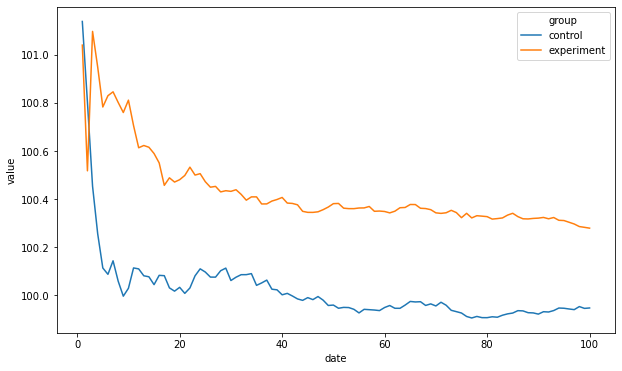

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=daily_data.reset_index(), x="date", y="value", hue = 'group')

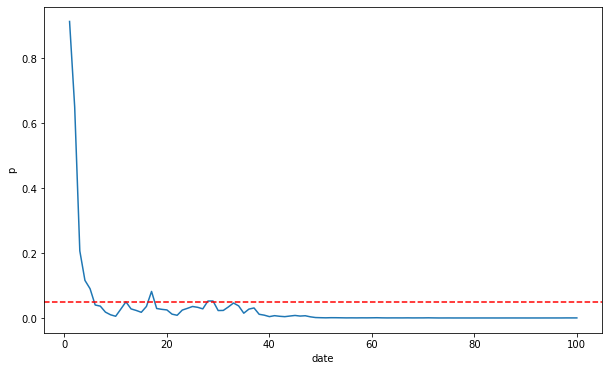

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=stat_result.reset_index(), x="date", y="p")
ax.axhline(0.05, ls='--', color='red')